## **Procter & Gamble Risk Analysis (2023 -2024)**

#P&G (NYSE: PG)

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
import enum
import seaborn as sns

from tabulate import tabulate
from scipy.stats import norm
from scipy.stats import gmean

In [ ]:
#Date range and stock

symbol = 'PG'
start_date = '2023-01-30'
end_date = '2024-01-30'

#Data import

df = yf.download(symbol, start=start_date, end=end_date)

print(df.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-01-30  140.960007  142.119995  140.279999  141.009995  137.513382   
2023-01-31  141.229996  142.470001  140.759995  142.380005  138.849396   
2023-02-01  142.080002  144.100006  141.350006  143.190002  139.639328   
2023-02-02  142.169998  142.710007  141.210007  142.169998  138.644608   
2023-02-03  142.779999  143.380005  141.169998  142.610001  139.073700   

             Volume  
Date                 
2023-01-30  6369300  
2023-01-31  9373400  
2023-02-01  7207900  
2023-02-02  6444300  
2023-02-03  5993100  


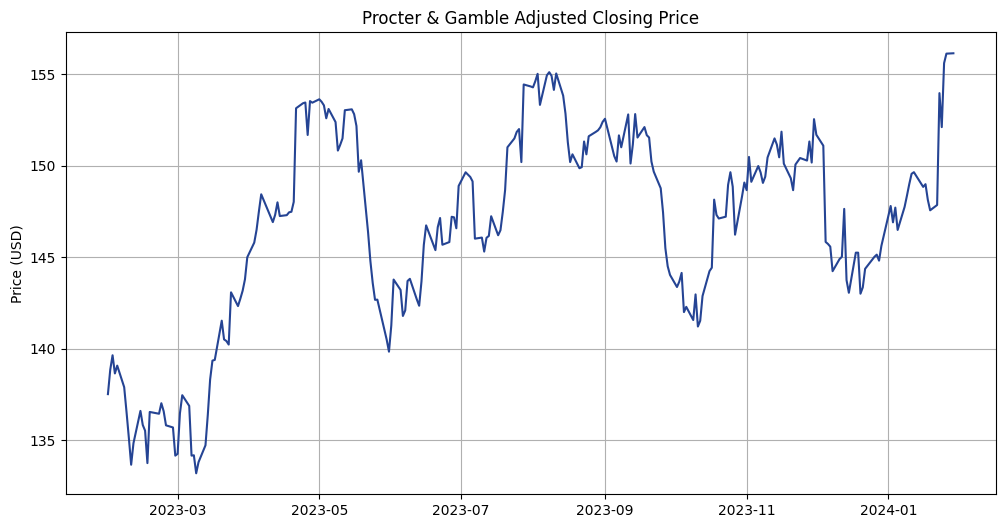

In [ ]:
#Plot the adjusted closing price

plt.figure(figsize = (12, 6))
plt.plot(df['Adj Close'], color='#254494')
plt.title('Procter & Gamble Adjusted Closing Price')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

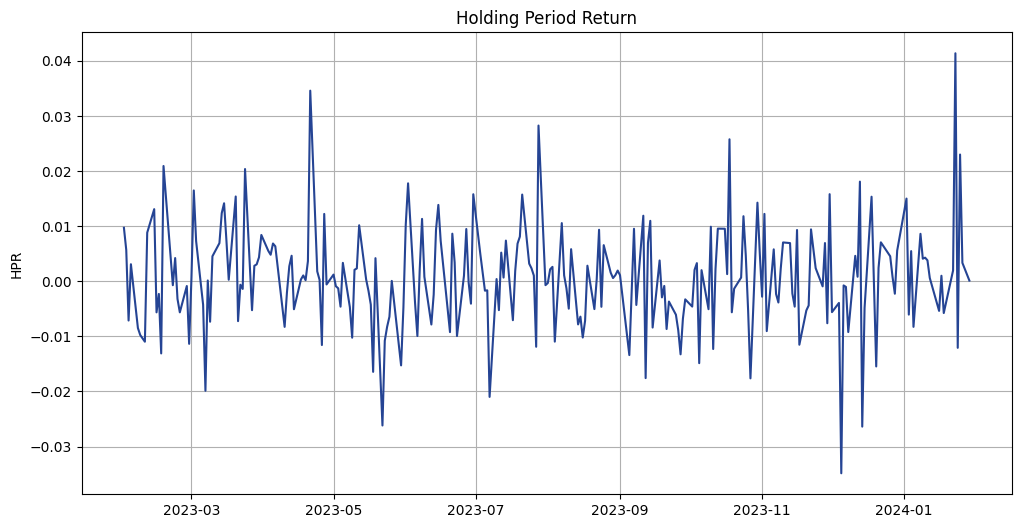

In [ ]:
#Calculate Holding Period Return (HPR)

df['Return'] = df['Adj Close'].pct_change()

#Remove the first row since it will have NaN value
df = df[1:]

#Plot HPR

plt.figure(figsize = (12, 6))
plt.plot(df['Return'], color = '#254494')
plt.title('Holding Period Return')
plt.ylabel('HPR')
plt.grid(True)
plt.show()

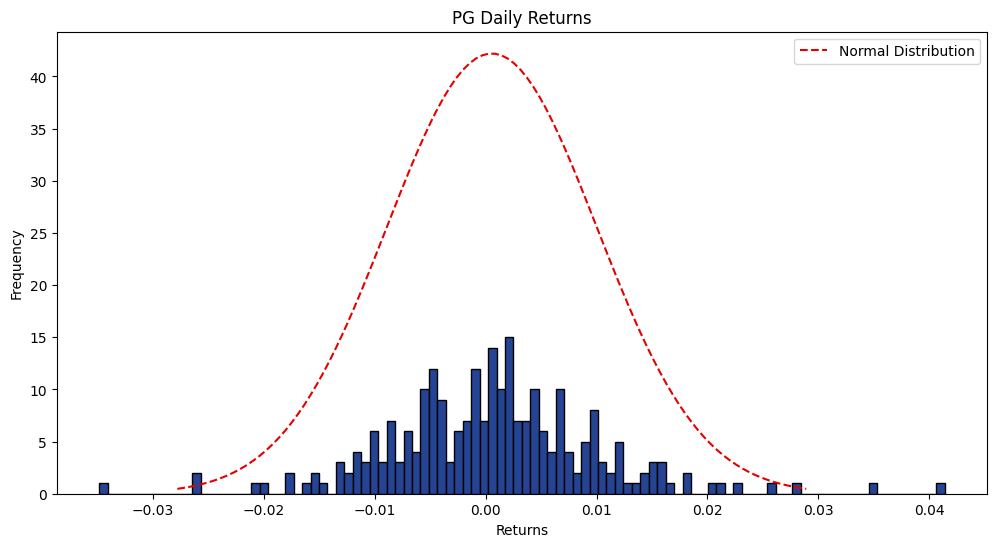

In [ ]:
#Plot Daily Returns of PG

plt.figure(figsize=(12, 6))
plt.hist(df['Return'], bins=100, edgecolor='black', color='#254494')
mu, sigma = np.mean(df['Return']), np.std(df['Return'])
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), color='#e60000', linestyle='--', label='Normal Distribution')
plt.title('PG Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
#Arithmetic Return and Geometric Return

arithmetic_return = df['Return'].mean()
geometric_return = np.prod(1 + df['Return'])**(1 / len(df)) - 1

print("Arithmetic Return:", 100 * round(arithmetic_return, 5), "%")
print("Geometric Return:", 100 * round(geometric_return, 6), "%")

Arithmetic Return: 0.055 %
Geometric Return: 0.0509 %


In [ ]:
# Assuming a $10,000 portfolio (P = $10,000) with value P is constant.
P = 10000

# Calculate PnL vector
PnL = P * df['Return']

# Statistical summary for Arithmetic returns
ar_num_observations = len(df)
ar_average = df['Return'].mean()
ar_median = df['Return'].median()
ar_stdev = df['Return'].std()
ar_max = df['Return'].max()
ar_min = df['Return'].min()
ar_range = ar_max - ar_min
ar_skewness = df['Return'].skew()
ar_excess_kurtosis = df['Return'].kurtosis()

# Calculate logarithm of the DataFrame
log_returns = np.log(df['Adj Close'] / df['Adj Close'].shift(1))

# Statistical summary for Geometric returns
gr_num_observations = len(log_returns)
gr_average = np.exp(np.mean(log_returns)) - 1
gr_median = gmean(1 + log_returns) - 1
gr_stdev = np.exp(np.std(log_returns)) - 1
gr_max = np.exp(np.max(log_returns)) - 1
gr_min = np.exp(np.min(log_returns)) - 1
gr_range = gr_max - gr_min
gr_skewness = log_returns.skew()
gr_excess_kurtosis = log_returns.kurtosis()

# Statistical summary for PnL
pl_num_observations = len(df)
pl_average = df['Return'].mean() * 10000
pl_median = df['Return'].median() * 10000
pl_stdev = df['Return'].std() * 10000
pl_max = df['Return'].max() * 10000
pl_min = df['Return'].min() * 10000
pl_range = (pl_max - pl_min)
pl_skewness = df['Return'].skew()
pl_excess_kurtosis = df['Return'].kurtosis()

# Create a table for summary statistics
summary_table = [
    ["Statistics", "Arithmetic Return", "Geometric Return", "PnL"],
    ["Number of observations", ar_num_observations, gr_num_observations, pl_num_observations],
    ["Average (mean)", round(ar_average * 100, 3), round(gr_average * 100, 3), round(pl_average, 3)],
    ["Median", round(ar_median * 100, 3), round(gr_median * 100, 4), round(pl_median, 3)],
    ["Standard Deviation", round(ar_stdev * 100, 3), round(gr_stdev * 100, 3), round(pl_stdev, 3)],
    ["Maximum", round(ar_max * 100, 3), round(gr_max * 100, 3), round(pl_max, 3)],
    ["Minimum", round(ar_min * 100, 3), round(gr_min * 100, 3), round(pl_min, 3)],
    ["Range", round(ar_range * 100, 3), round(gr_range * 100, 3), round(pl_range, 3)],
    ["Skewness", round(ar_skewness, 3), round(gr_skewness, 3), round(pl_skewness, 3)],
    ["Excess Kurtosis", round(ar_excess_kurtosis, 2), round(gr_excess_kurtosis, 3), round(pl_excess_kurtosis, 3)]
]

print(tabulate(summary_table, headers="firstrow", tablefmt="fancy_grid"))

╒════════════════════════╤═════════════════════╤════════════════════╤══════════╕
│ Statistics             │   Arithmetic Return │   Geometric Return │      PnL │
╞════════════════════════╪═════════════════════╪════════════════════╪══════════╡
│ Number of observations │             250     │            250     │  250     │
├────────────────────────┼─────────────────────┼────────────────────┼──────────┤
│ Average (mean)         │               0.055 │              0.047 │    5.533 │
├────────────────────────┼─────────────────────┼────────────────────┼──────────┤
│ Median                 │               0.059 │            nan     │    5.916 │
├────────────────────────┼─────────────────────┼────────────────────┼──────────┤
│ Standard Deviation     │               0.947 │              0.948 │   94.721 │
├────────────────────────┼─────────────────────┼────────────────────┼──────────┤
│ Maximum                │               4.139 │              4.139 │  413.905 │
├────────────────────────┼──

In [ ]:
#Parametric VaR estimates
#Parameters

alpha_90 = 0.1 #90% confidence level
alpha_95 = 0.05 #95% confidence level
alpha_99 = 0.01 #99% confidence level

#Calculate 1 day VaR estimates

h = 1 #Holding period (in days)
VaR_1d_90 = -((h * ar_average) - (math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_90))) * P
VaR_1d_95 = -((h * ar_average) - (math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_95))) * P
VaR_1d_99 = -((h * ar_average) - (math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_99))) * P

#Calculate 5 day VaR estimate

h = 5 #Holding period (in days)
VaR_5d_95 = -((h * ar_average) - (math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_95))) * P

#Calculate 10 day VaR estimate

h = 10 #Holding period (in days)
VaR_10d_99 = -((h * ar_average) - (math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_99))) * P

print("Parametric VaR Estimates:")
print("1-day 90% VaR:", "$", round(VaR_1d_90, 2))
print("1-day 95% VaR:", "$", round(VaR_1d_95, 2))
print("1-day 99% VaR:", "$", round(VaR_1d_99, 2))
print("5-day 95% VaR:", "$", round(VaR_5d_95, 2))
print("10-day 99% VaR:", "$", round(VaR_10d_99, 2))

Parametric VaR Estimates:
1-day 90% VaR: $ 115.86
1-day 95% VaR: $ 150.27
1-day 99% VaR: $ 214.82
5-day 95% VaR: $ 320.72
10-day 99% VaR: $ 641.49


In [ ]:
#Parametric lognormal VaR estimates
#Parameters

alpha_90 = 0.1 #90% confidence level
alpha_95 = 0.05 #95% confidence level
alpha_99 = 0.01 #99% confidence level

#Calculate parametric lognormal VaR estimates
#Calculate 1 day lognormal VaR estimates

h = 1 #Holding period (in days)
log_VaR_1d_90 = (1 - math.exp(h * geometric_return - math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_90))) * P
log_VaR_1d_95 = (1 - math.exp(h * geometric_return - math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_95))) * P
log_VaR_1d_99 = (1 - math.exp(h * geometric_return - math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_99))) * P

#Calculate 5 day lognormal VaR estimate

h = 5 #Holding period (in days)
log_VaR_5d_95 = (1 - math.exp(h * geometric_return - math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_95))) * P

#Calculate 10 day lognormal VaR estimate

h = 10 #Holding period (in days)
log_VaR_10d_99 = (1 - math.exp(h * geometric_return - math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_99))) * P

print("Parametric Lognormal VaR Estimates:")
print("1-day 90% Lognormal VaR:", "$", round(log_VaR_1d_90, 2))
print("1-day 95% Lognormal VaR:", "$", round(log_VaR_1d_95, 2))
print("1-day 99% Lognormal VaR:", "$", round(log_VaR_1d_99, 2))
print("5-day 95% Lognormal VaR:", "$", round(log_VaR_5d_95, 2))
print("10-day 99% Lognormal VaR:", "$", round(log_VaR_10d_99, 2))

Parametric Lognormal VaR Estimates:
1-day 90% Lognormal VaR: $ 175.37
1-day 95% Lognormal VaR: $ 225.39
1-day 99% Lognormal VaR: $ 318.54
5-day 95% Lognormal VaR: $ 488.77
10-day 99% Lognormal VaR: $ 953.72


In [ ]:
#Parametric lognormal VaR estimates for short portfolio

P = -10000 #Short portfolio value

#Parameters

alpha_90 = 0.1 #90% confidence level
alpha_95 = 0.05 #95% confidence level
alpha_99 = 0.01 #99% confidence level

#Calculate parametric lognormal VaR estimates
#Calculate 1 day lognormal VaR estimates

h = 1 #Holding period (in days)
short_VaR_1d_90 = (1 - math.exp(h * geometric_return + math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_90))) * P
short_VaR_1d_95 = (1 - math.exp(h * geometric_return + math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_95))) * P
short_VaR_1d_99 = (1 - math.exp(h * geometric_return + math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_99))) * P

#Calculate 5 day lognormal VaR estimate

h = 5 #Holding period (in days)
short_VaR_5d_95 = (1 - math.exp(h * geometric_return + math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_95))) * P

#Calculate 10 day lognormal VaR estimate

h = 10 #Holding period (in days)
short_VaR_10d_99 = (1 - math.exp(h * geometric_return + math.sqrt(h) * ar_stdev * norm.ppf(1 - alpha_99))) * P

print("Parametric Lognormal VaR Estimates for the Short Portfolio:")
print("1-day 90% Short VaR:", "$", round(short_VaR_1d_90, 2))
print("1-day 95% Short VaR:", "$", round(short_VaR_1d_95, 2))
print("1-day 99% Short VaR:", "$", round(short_VaR_1d_99, 2))
print("5-day 95% Short VaR:", "$", round(short_VaR_5d_95, 2))
print("10-day 99% Short VaR:", "$", round(short_VaR_10d_99, 2))

Parametric Lognormal VaR Estimates for the Short Portfolio:
1-day 90% Short VaR: $ 184.87
1-day 95% Short VaR: $ 236.99
1-day 99% Short VaR: $ 335.48
5-day 95% Short VaR: $ 546.82
10-day 99% Short VaR: $ 1123.62


In [ ]:
#t-Distribution parametric VaR estimates

#Parameters

alpha_90 = 0.1 #90% confidence level
alpha_95 = 0.05 #95% confidence level
alpha_99 = 0.01 #99% confidence level
#Estimate the best degree of freedom using Kurtosis

degree_of_freedom = (6 + 4 * ar_excess_kurtosis) / ar_excess_kurtosis

print("Degree of Freedom:", round(degree_of_freedom, 0))

#Calculate 1 day VaR estimates

h = 1 #Holding period (in days)
tVaR_1d_90 = (-h * ar_average + math.sqrt(h) * math.sqrt((degree_of_freedom - 2) / degree_of_freedom) * ar_stdev * stats.t.ppf(1 - alpha_90, degree_of_freedom)) * P
tVaR_1d_95 = (-h * ar_average + math.sqrt(h) * math.sqrt((degree_of_freedom - 2) / degree_of_freedom) * ar_stdev * stats.t.ppf(1 - alpha_95, degree_of_freedom)) * P
tVaR_1d_99 = (-h * ar_average + math.sqrt(h) * math.sqrt((degree_of_freedom - 2) / degree_of_freedom) * ar_stdev * stats.t.ppf(1 - alpha_99, degree_of_freedom)) * P

#Calculate 5 day VaR estimate

h = 5 #Holding period (in days)
tVaR_5d_95 = (-h * ar_average + math.sqrt(h) * math.sqrt((degree_of_freedom - 2) / degree_of_freedom) * ar_stdev * stats.t.ppf(1 - alpha_95, degree_of_freedom)) * P

#Calculate 10 day VaR estimate

h = 10 #Holding period (in days)
tVaR_10d_99 = (-h * ar_average + math.sqrt(h) * math.sqrt((degree_of_freedom - 2) / degree_of_freedom) * ar_stdev * stats.t.ppf(1 - alpha_99, degree_of_freedom)) * P

print("Parametric t-Distribution VaR Estimates:")
print("1-day 90% t-Dist VaR:", "$", round(tVaR_1d_90, 2))
print("1-day 95% t-Dist VaR:", "$", round(tVaR_1d_95, 2))
print("1-day 99% t-Dist VaR:", "$", round(tVaR_1d_99, 2))
print("5-day 95% t-Dist VaR:", "$", round(tVaR_5d_95, 2))
print("10-day 99% t-Dist VaR:", "$", round(tVaR_10d_99, 2))

Degree of Freedom: 6.0
Parametric t-Distribution VaR Estimates:
1-day 90% t-Dist VaR: $ 106.87
1-day 95% t-Dist VaR: $ 145.53
1-day 99% t-Dist VaR: $ 235.91
5-day 95% t-Dist VaR: $ 310.11
10-day 99% t-Dist VaR: $ 708.17


In [ ]:
#Historical Simulation (Empirical) VaR Estimates

df_PnL = df.copy()
df_PnL['PnL'] = PnL

PnL_data = df_PnL['PnL'].values

# Calculate Empirical VaR estimates
var_90 = -np.percentile(PnL_data, 10)
var_95 = -np.percentile(PnL_data, 5)
var_99 = -np.percentile(PnL_data, 1)

In [ ]:
#Historical simulation VaR

# Define the 1-day VaR at the specified confidence levels
VaR_1_day_90 = var_90
VaR_1_day_95 = var_95
VaR_1_day_99 = var_99

# Calculate the VaR for the desired holding periods using the square root of time formula
holding_periods = [1, 5, 10]
confidence_levels = [90, 95, 99]

for holding_period in holding_periods:
    for confidence_level in confidence_levels:
        VaR_h_day = np.sqrt(holding_period) * eval(f"VaR_1_day_{confidence_level}")
        VaR_h_day = round(VaR_h_day, 2)
        print(f"{holding_period}-day {confidence_level}% VaR: ${VaR_h_day}")

1-day 90% VaR: $102.1
1-day 95% VaR: $131.87
1-day 99% VaR: $236.36
5-day 90% VaR: $228.31
5-day 95% VaR: $294.87
5-day 99% VaR: $528.52
10-day 90% VaR: $322.88
10-day 95% VaR: $417.01
10-day 99% VaR: $747.44


In [ ]:
#Historical Simulation Expected Shortfall (ES) Estimates

#Sort PnL in ascending order and define the confidence levels of ES

sorted_PnL = np.sort(PnL)

#Compute the ES estimates
es_90 = -np.mean(sorted_PnL[:int(len(sorted_PnL) * 0.1)])
es_95 = -np.mean(sorted_PnL[:int(len(sorted_PnL) * 0.05)])
es_99 = -np.mean(sorted_PnL[:int(len(sorted_PnL) * 0.01)])
es_5day_95 = -np.mean(sorted_PnL[:int(len(sorted_PnL) * 0.05)]) * 5
es_10day_99 = -np.mean(sorted_PnL[:int(len(sorted_PnL) * 0.01)]) * 10

print("Expected Shortfall Estimates:")
print("1-day 90% ES:", "$", round(es_90, 2))
print("1-day 95% ES:", "$", round(es_95, 2))
print("1-day 99% ES:", "$", round(es_99, 2))
print("5-day 95% ES:", "$", round(es_5day_95, 2))
print("10-day 99% ES:", "$", round(es_10day_99, 2))

Expected Shortfall Estimates:
1-day 90% ES: $ 155.72
1-day 95% ES: $ 199.1
1-day 99% ES: $ 306.19
5-day 95% ES: $ 995.5
10-day 99% ES: $ 3061.89


In [ ]:
#Parametric Expected Shortfall Estimates

es_parametric_90 = P * (ar_average - 1.755 * ar_stdev)
es_parametric_95 = P * (ar_average - 2.063 * ar_stdev)
es_parametric_99 = P * (ar_average - 2.665 * ar_stdev)
es_5day_95 = P * (ar_average - 2.063 * ar_stdev) * np.sqrt(5)
es_10day_99 = P * (ar_average - 2.665 * ar_stdev) * np.sqrt(10)

print("Parametric Expected Shortfall Estimates:")
print("1-day 90% ES:", "$", round(es_parametric_90, 2))
print("1-day 95% ES:", "$", round(es_parametric_95, 2))
print("1-day 99% ES:", "$", round(es_parametric_99, 2))
print("5-day 95% ES:", "$", round(es_5day_95, 2))
print("10-day 99% ES:", "$", round(es_10day_99, 2))

Parametric Expected Shortfall Estimates:
1-day 90% ES: $ -160.7
1-day 95% ES: $ -189.88
1-day 99% ES: $ -246.9
5-day 95% ES: $ -424.58
10-day 99% ES: $ -780.76


In [ ]:
#Monte Carlo simulation for VaR estimates

#Parameters

P = 10000
iterations = 200 #Number of Monte Carlo iterations

# Define scenarios
scenarios = [
    {"h": 1, "alpha": 0.1, "label": "1-day 90% Monte Carlo VaR:"},
    {"h": 1, "alpha": 0.05, "label": "1-day 95% Monte Carlo VaR:"},
    {"h": 1, "alpha": 0.01, "label": "1-day 99% Monte Carlo VaR:"},
    {"h": 5, "alpha": 0.05, "label": "5-day 95% Monte Carlo VaR:"},
    {"h": 10, "alpha": 0.01, "label": "10-day 99% Monte Carlo VaR:"},
]

print("Monte Carlo VaR Estimates:")

VaR_estimates = []

# Monte Carlo simulations
for scenario in scenarios:
    h = scenario["h"]
    alpha = scenario["alpha"]
    VaR_scenario = []

    # Generate random samples of arithmetic returns
    s_arithmetic_returns = np.random.normal(ar_average, ar_stdev, size=(h, iterations))

    # Calculate portfolio value at the end of the holding period
    P_h = P * np.prod(1 + s_arithmetic_returns, axis=0)

    # Sort portfolio values
    sorted_portfolio_values = np.sort(P_h)

    # Calculate VaR estimates
    VaR_scenario.append(P - sorted_portfolio_values[int(alpha * len(sorted_portfolio_values))])
    VaR_estimates.append(VaR_scenario)

    # Print VaR estimates
    print(scenario["label"], "$", round(VaR_scenario[0], 2))

Monte Carlo VaR Estimates:
1-day 90% Monte Carlo VaR: $ 110.94
1-day 95% Monte Carlo VaR: $ 126.23
1-day 99% Monte Carlo VaR: $ 166.22
5-day 95% Monte Carlo VaR: $ 304.0
10-day 99% Monte Carlo VaR: $ 782.0


<ipython-input-70-2b84fe46bfd7>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(P_h, kde=False, bins=100)


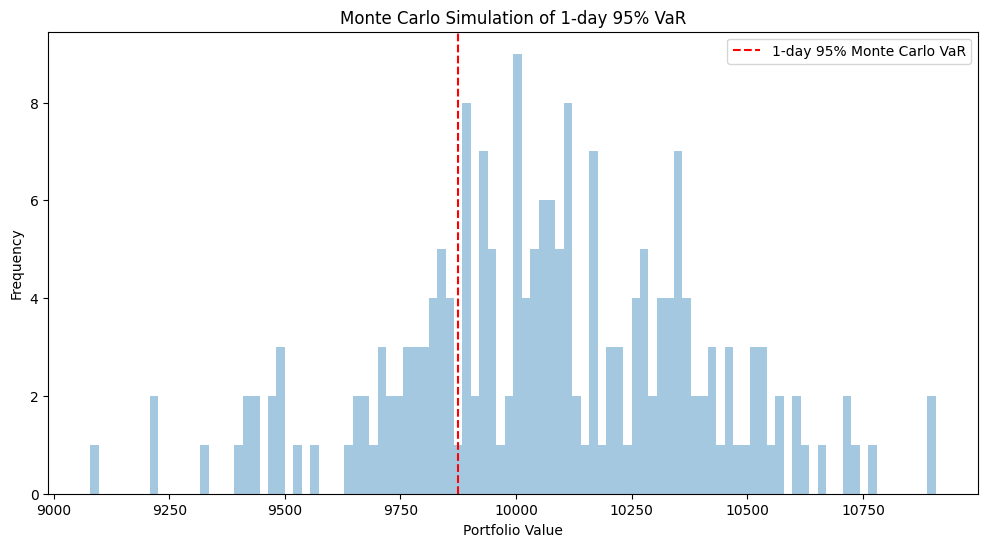

In [ ]:
# prompt: visualize the above 1-day 95% Monte Carlo VaR

import matplotlib.pyplot as plt
# Extract the 1-day 95% Monte Carlo VaR estimate
mc_var_1d_95 = VaR_estimates[1][0]

# Plot the Monte Carlo simulation results for the 1-day 95% VaR
plt.figure(figsize=(12, 6))
sns.distplot(P_h, kde=False, bins=100)
plt.axvline(x=P - mc_var_1d_95, color='red', linestyle='--', label='1-day 95% Monte Carlo VaR')
plt.title('Monte Carlo Simulation of 1-day 95% VaR')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

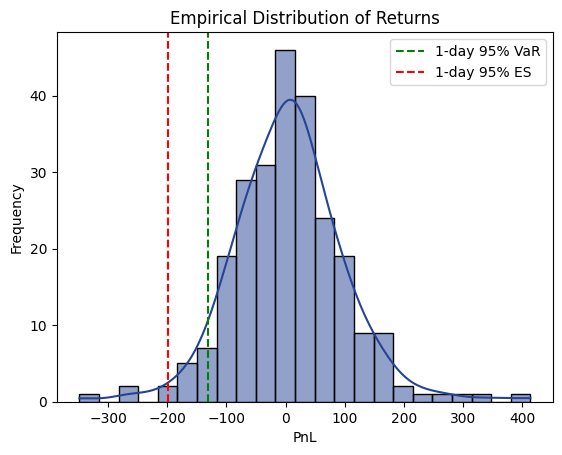

In [ ]:
# Plot the empirical distribution of returns
sns.histplot(PnL, kde=True, color = '#254494')

# Add vertical lines for VaR and ES levels
var_1d_95 = np.percentile(PnL, 5)
es_1d_95 = np.mean(sorted(PnL)[:int(len(PnL) * 0.05)])

plt.axvline(var_1d_95, color='g', linestyle='--', label='1-day 95% VaR')
plt.axvline(es_1d_95, color='r', linestyle='--', label='1-day 95% ES')

# Set plot labels and title
plt.xlabel('PnL')
plt.ylabel('Frequency')
plt.title('Empirical Distribution of Returns')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Appendix


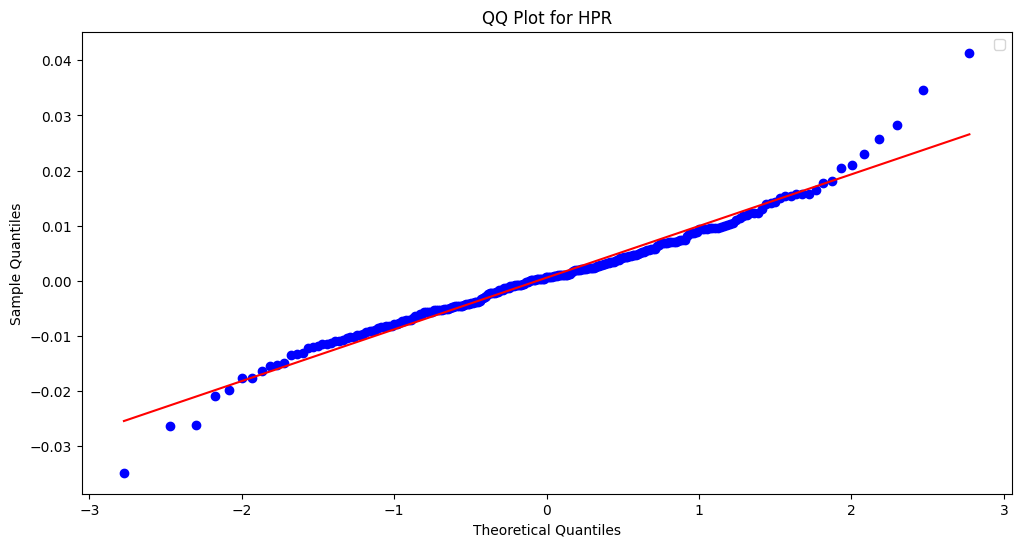

In [ ]:
plt.figure(figsize=(12, 6))
qq_plot = stats.probplot(df['Return'], dist="norm", plot=plt)
plt.title('QQ Plot for HPR')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.legend()
plt.show()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


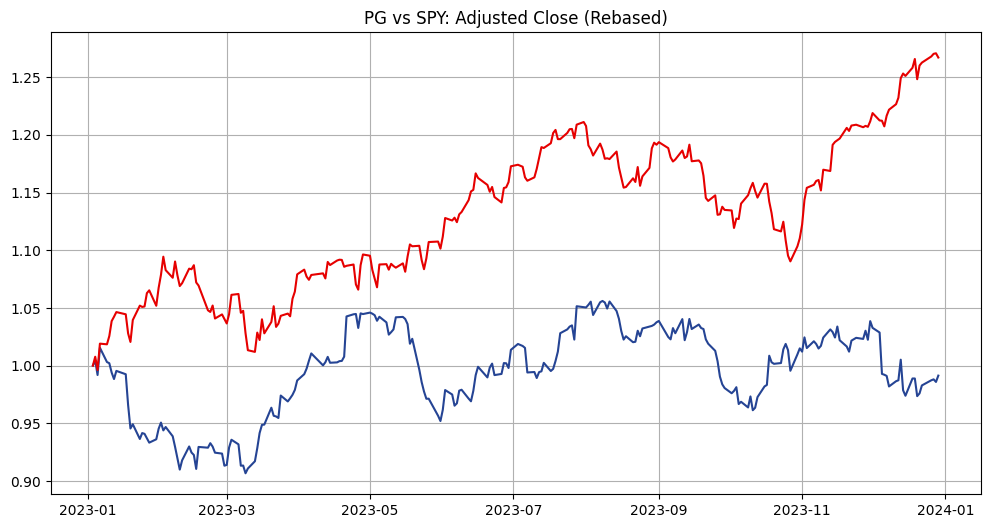

In [ ]:
# Downloading data from Yahoo Finance
start_date = '2023-01-01'
end_date = '2024-01-01'
symbol_pg = 'PG'
symbol_spy = 'SPY'

data_pg = yf.download(symbol_pg, start=start_date, end=end_date)['Adj Close']
data_spy = yf.download(symbol_spy, start=start_date, end=end_date)['Adj Close']

# Calculating the rebased series
rebased_pg = data_pg / data_pg.iloc[0]
rebased_spy = data_spy / data_spy.iloc[0]

# Plotting the rebased series
plt.figure(figsize=(12, 6))
plt.plot(rebased_pg, label='PG', color = '#254494')
plt.plot(rebased_spy, label='SPY', color = '#e60000')
plt.title('PG vs SPY: Adjusted Close (Rebased)')
plt.grid(True)
plt.show()